In [6]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.linear_model import Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from io import StringIO 
%matplotlib inline 
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set(style="ticks")

## Загрузка данных

In [7]:
data = pd.read_csv("/home/igor/Документы/mllabs/rk2/HRDataset_v14.csv",sep=',')
data.shape
data["RaceDesc"].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

## Предварительная обработка данных

In [8]:
data.drop(["Employee_Name","EmpID","Position","LastPerformanceReview_Date","CitizenDesc","State","DateofHire","Zip","DOB","MarriedID","MaritalDesc","DateofTermination","TermReason","Sex","Department","HispanicLatino","ManagerName","EmploymentStatus","PerformanceScore","RaceDesc","RecruitmentSource"],axis=1,inplace=True)
data = data.dropna(axis = 1 , how = "any")

## Анализ полученного датасета

In [9]:
# первые 5 строк датасета
data.head()

,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,1,1,5,4,0,62506,0,19,4.60,5,0,0,1
1,1,1,5,3,3,0,104437,1,27,4.96,3,6,0,17
2,1,0,5,5,3,0,64955,1,20,3.02,3,0,0,3
3,1,0,1,5,3,0,64991,0,19,4.84,5,0,0,15
4,2,0,5,5,3,0,50825,1,19,5.00,4,0,0,2


<AxesSubplot:>

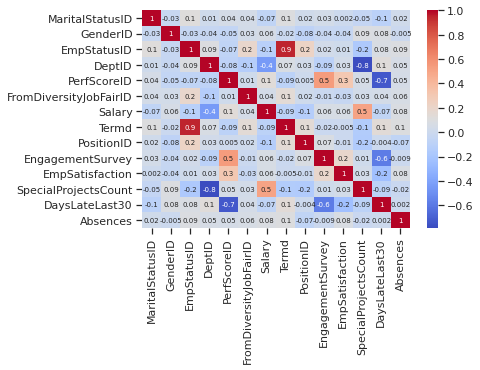

In [10]:
# корелляционная матрица
sns.heatmap(data.corr(),annot = True,fmt='.1g', cmap= 'coolwarm',annot_kws={"size":7})

## Разбиение датасета на тестовую и тренировочную выборки

In [11]:
data_Y = data.loc[:, 'PerfScoreID']
data_X = data.drop(["PerfScoreID"],axis=1,inplace=False)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_X, data_Y,test_size=0.35, random_state=360)   

## Обучение моделей

#### В качестве метрик качества рассматриваемых моделей будем использовать accuracy (как наглядную численную оценку) и матрицу ошибок, чтобы понять распределение ошибок по классам.

In [12]:
cl1 = RidgeClassifier()
cl1.fit(data_X_train,data_y_train)
target1_0 = cl1.predict(data_X_train)
target1_1 = cl1.predict(data_X_test)
accuracy_score(data_y_train, target1_0), accuracy_score(data_y_test, target1_1)

(0.8316831683168316, 0.8256880733944955)

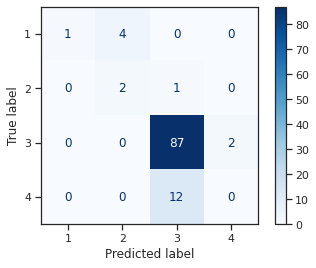

In [13]:
confusion_matrix(data_y_test, target1_1, labels=[1, 2,3 ,4])
plot_confusion_matrix(cl1, data_X_test, data_y_test, 
                      display_labels=[1, 2,3 ,4], cmap=plt.cm.Blues)

In [14]:
cl2 =  GradientBoostingClassifier()
cl2.fit(data_X_train,data_y_train)
target2_0 = cl2.predict(data_X_train)
target2_1 = cl2.predict(data_X_test)
accuracy_score(data_y_train, target2_0), accuracy_score(data_y_test, target2_1)

(1.0, 0.8073394495412844)

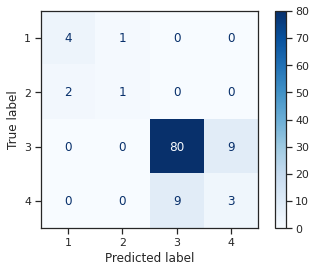

In [15]:
confusion_matrix(data_y_test, target1_1, labels=[1, 2,3 ,4])
plot_confusion_matrix(cl2, data_X_test, data_y_test, 
                      display_labels=[1, 2,3 ,4], cmap=plt.cm.Blues)

### В качестве вывода об оценке  качества моделей можно указать, что обе модели показали схожие результаты, а ошибки вызванные неверным определением некоторых классов могут быть вызваны неравномерностью распределения классов в датасете или при разбиении датасета на тренировочную и тестовую выборки